In [1]:
import main
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
input_path = main_path + "input/50p_age_moms/"

trans_path = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
test_trans_path = main_path + "input/50p_age_moms/MH_trans_test_age.csv"
iid_trans_path = main_path + "input/50p_age_moms/MH_trans_test_iid.csv"
perm_trans_path = main_path + "input/50p_age_moms/MH_trans_test_perm.csv"

do_dpi_calib = False
# do_dpi_calib = True
output_flag = False
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_path,
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)

Running main
*****Running main_io with default out_folder_name*****
Solver ran in 7.60895540000638 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 2.1986477, w0_sd_targ = 0.29952401, 
                                        w1_targ = 0.2915204, w2_targ = 0.27134400000000003, wH_targ = 0.051474661,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
my_dpi_BB_mom: 0.46970300961746186, my_dpi_GG_mom: 0.011275672584050538
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
my_dpi_BB_mom: 0.46970300961746186, my_dpi_GG_mom: 0.011275672584050538
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
my_dpi_BB_mom: 0.46970300961746186, my_dpi_GG_mom: 0.011275672584050538
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
my_dpi_BB_mom: 0.46970300961746186, my_dpi_GG_mom: 0.011275672584050538
Calibratin

In [2]:
import calibration as calib
importlib.reload(main)
importlib.reload(calib)
do_dpi_calib = True
output_flag = False
myPars_adj, myShocks_adj, sols_adj, sims_adj = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_path,
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)


*****Running main_io with default out_folder_name*****
Solver ran in 0.798065900002257 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 2.1986477, w0_sd_targ = 0.29952401, 
                                        w1_targ = 0.2915204, w2_targ = 0.27134400000000003, wH_targ = 0.051474661,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating delta_pi_GG
my_dpi_BB_mom: 0.46970300961746186, my_dpi_GG_mom: 0.34394350525605566
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
my_dpi_BB_mom: 0.4560805301491208, my_dpi_GG_mom: 0.34394350525605566
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
my_dpi_BB_mom: 0.4560805301491208, my_dpi_GG_mom: 0.34394350525605566
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
my_dpi_BB_mom: 0.4560805301491208, my_dpi_GG_mom: 0.34394350525605566
Calib

In [3]:
import pandas as pd
import model_uncert as model
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
print("bad_MH_age_data", bad_MH_age_data.head())
# get second column as numpy array
bad_hist_age_data = bad_MH_age_data.to_numpy()[:,1:]

hist = myShocks.H_hist
bad_hist = 1 - hist 
bad_hist_age = np.sum(model.gen_weighted_sim(myPars, bad_hist), tuple(range(bad_hist.ndim - 1)))
print("bad_hist_age \t", bad_hist_age[:5])

hist_adj = myShocks_adj.H_hist
bad_hist_adj = 1 - hist_adj
bad_hist_age_adj = np.sum(model.gen_weighted_sim(myPars_adj, bad_hist_adj), tuple(range(bad_hist_adj.ndim - 1)))
print("bad_hist_age_adj", bad_hist_age_adj[:5], "\n")


bad_MH_age_data    age  mean_badMH
0   25    0.480863
1   26    0.490605
2   27    0.476934
3   28    0.457216
4   29    0.461356
bad_hist_age 	 [0.48       0.48965349 0.49950501 0.47921842 0.49748972]
bad_hist_age_adj [0.48       0.53029476 0.51721044 0.48464043 0.49545429] 



In [4]:
H_trans_uncond_data = myPars.H_trans_uncond
H_trans = myPars.H_trans
H_trans_adj = myPars_adj.H_trans
print("H_trans_uncond_data \n", H_trans_uncond_data[:1, :, :])
print("H_trans \n", H_trans[:, :1, :, :])
print("H_trans_adj \n", H_trans_adj[:, :1, :, :])

H_trans_uncond_data 
 [[[0.72708672 0.27291328]
  [0.27032781 0.72967219]]]
H_trans 
 [[[[0.72708672 0.27291328]
   [0.27032781 0.72967219]]]


 [[[0.72708672 0.27291328]
   [0.27032781 0.72967219]]]]
H_trans_adj 
 [[[[ 0.72708672  0.27291328]
   [ 0.70927124  0.29072876]]]


 [[[ 0.72708672  0.27291328]
   [-0.16861562  1.16861562]]]]


In [5]:
import pars_shocks
BAD, LOW = 0, 0
GOOD, HIGH = 1, 1

bad_hist0 = bad_hist[:,:,:,0]
bad_hist_adj0 = bad_hist_adj[:,:,:,0]

theta_b_0 = np.sum(bad_hist0)
theta_b_0_adj = np.sum(bad_hist_adj0)
print("theta_b_0", theta_b_0)
print("theta_b_0_adj", theta_b_0_adj)

theta_bH_0 = np.sum(bad_hist0[:, HIGH, :])
theta_bH_0_adj = np.sum(bad_hist_adj0[:, HIGH, :])
print("theta_bH_0", theta_bH_0)
print("theta_bH_0_adj", theta_bH_0_adj)

omega_b_0 = theta_bH_0 / theta_b_0
omega_b_0_adj = theta_bH_0_adj / theta_b_0_adj
print("omega_b_0", omega_b_0)
print("omega_b_0_adj", omega_b_0_adj)

dpi_BB = myPars.delta_pi_BB
dpi_BB_adj = myPars_adj.delta_pi_BB
print("dpi_BB", dpi_BB)
print("dpi_BB_adj", dpi_BB_adj)

x_bb_0 = 1/(omega_b_0*(1-myPars.delta_pi_BB) + (1-omega_b_0)*(1+myPars.delta_pi_BB))
x_bb_0_adj = 1/(omega_b_0_adj*(1-myPars_adj.delta_pi_BB) + (1-omega_b_0_adj)*(1+myPars_adj.delta_pi_BB))
print("x_bb_0", x_bb_0)
print("x_bb_0_adj", x_bb_0_adj)

theta_b_0 9600
theta_b_0_adj 9600
theta_bH_0 4800
theta_bH_0_adj 4800
omega_b_0 0.5
omega_b_0_adj 0.5
dpi_BB 0.0
dpi_BB_adj 0.0
x_bb_0 1.0
x_bb_0_adj 1.0


In [11]:

import pars_shocks
BAD, LOW = 0, 0
GOOD, HIGH = 1, 1

bad_hist0 = hist[:,:,:,0]
bad_hist_adj0 = hist_adj[:,:,:,0]

theta_b_0 = np.sum(bad_hist0)
theta_b_0_adj = np.sum(bad_hist_adj0)
print("theta_g_0", theta_b_0)
print("theta_g_0_adj", theta_b_0_adj)

theta_bH_0 = np.sum(bad_hist0[:, HIGH, :])
theta_bH_0_adj = np.sum(bad_hist_adj0[:, HIGH, :])
print("theta_gH_0", theta_bH_0)
print("theta_gH_0_adj", theta_bH_0_adj)

omega_b_0 = theta_bH_0 / theta_b_0
omega_b_0_adj = theta_bH_0_adj / theta_b_0_adj
print("omega_g_0", omega_b_0)
print("omega_g_0_adj", omega_b_0_adj)

dpi_BB = myPars.delta_pi_GG
dpi_BB_adj = myPars_adj.delta_pi_GG
print("dpi_GG", dpi_BB)
print("dpi_GG_adj", dpi_BB_adj)
delta = myPars.delta_pi_GG
delta_adj = myPars_adj.delta_pi_GG
x_gg_0 = 1/(omega_b_0*(1+delta) + (1-omega_b_0)*(1-delta))
x_gg_0_adj = 1/(omega_b_0_adj*(1+delta_adj) + (1-omega_b_0_adj)*(1-delta_adj))

theta_g_0 10400
theta_g_0_adj 10400
theta_gH_0 5200
theta_gH_0_adj 5200
omega_g_0 0.5
omega_g_0_adj 0.5
dpi_GG 0.0
dpi_GG_adj 0.6015625


In [12]:
hist0 = bad_hist[:,:,:,0]
hist_adj0 = bad_hist_adj[:,:,:,0]

theta_g_0 = np.sum(hist0)
theta_g_0_adj = np.sum(hist_adj0)
print("theta_b_0", theta_g_0)
print("theta_b_0_adj", theta_g_0_adj)

theta_gH_0 = np.sum(hist0[:, HIGH, :])
theta_gH_0_adj = np.sum(hist_adj0[:, HIGH, :])
print("theta_bH_0", theta_gH_0)
print("theta_bH_0_adj", theta_gH_0_adj)

omega_g_0 = theta_gH_0 / theta_g_0
omega_g_0_adj = theta_gH_0_adj / theta_g_0_adj
print("omega_b_0", omega_g_0)
print("omega_b_0_adj", omega_g_0_adj)

dpi_GG = myPars.delta_pi_GG
dpi_GG_adj = myPars_adj.delta_pi_GG
print("dpi_GG", dpi_GG)
print("dpi_GG_adj", dpi_GG_adj)

x_bg_0 = H_trans_uncond_data[0, BAD, GOOD]/(omega_g_0*H_trans[HIGH, 0, BAD, GOOD] 
                                            +  (1-omega_g_0)*H_trans[LOW, 0, BAD, GOOD])
x_bg_0_adj = H_trans_uncond_data[0, BAD, GOOD]/(omega_g_0_adj * H_trans_adj[HIGH, 0, BAD, GOOD]
                                                + (1-omega_g_0_adj)*H_trans_adj[LOW, 0, BAD, GOOD])
print("x_bg_0", x_bg_0)
print("x_bg_0_adj", x_bg_0_adj)

theta_b_0 9600
theta_b_0_adj 9600
theta_bH_0 4800
theta_bH_0_adj 4800
omega_b_0 0.5
omega_b_0_adj 0.5
dpi_GG 0.0
dpi_GG_adj 0.6015625
x_bg_0 0.9999999999999998
x_bg_0_adj 0.9999999999999998


In [ ]:

hist0 = hist[:,:,:,0]
hist_adj0 = hist_adj[:,:,:,0]

theta_g_0 = np.sum(hist0)
theta_g_0_adj = np.sum(hist_adj0)
print("theta_g_0", theta_g_0)
print("theta_g_0_adj", theta_g_0_adj)

theta_gH_0 = np.sum(hist0[:, HIGH, :])
theta_gH_0_adj = np.sum(hist_adj0[:, HIGH, :])
print("theta_gH_0", theta_gH_0)
print("theta_gH_0_adj", theta_gH_0_adj)

omega_g_0 = theta_gH_0 / theta_g_0
omega_g_0_adj = theta_gH_0_adj / theta_g_0_adj
print("omega_g_0", omega_g_0)
print("omega_g_0_adj", omega_g_0_adj)

dpi_GG = myPars.delta_pi_GG
dpi_GG_adj = myPars_adj.delta_pi_GG
print("dpi_GG", dpi_GG)
print("dpi_GG_adj", dpi_GG_adj)

x_gb_0 = H_trans_uncond_data[0, GOOD, BAD]/(omega_g_0*H_trans[HIGH, 0, GOOD, BAD] 
                                            +  (1-omega_g_0)*H_trans[LOW, 0, GOOD, BAD])
x_gb_0_adj = H_trans_uncond_data[0, GOOD, BAD]/(omega_g_0_adj*H_trans_adj[HIGH, 0, GOOD, BAD] 
                                                +  (1-omega_g_0_adj) * H_trans_adj[LOW, 0, GOOD, BAD])
print("x_gb_0", x_gb_0)
print("x_gb_0_adj", x_gb_0_adj)

In [7]:
pi_gb_0 = H_trans_uncond_data[0, GOOD, BAD] 
print("pi_gb_0", pi_gb_0)
pi_gbH_0_adj = H_trans_adj[HIGH, 0, GOOD, BAD]
print("pi_gbH_0_adj", pi_gbH_0_adj)
pi_gbL_0_adj = H_trans_adj[LOW, 0, GOOD, BAD]
print("pi_gbL_0_adj", pi_gbL_0_adj)

# applying x_gb_0_adj directly
pi_gb_0_adj = x_gb_0_adj * (omega_g_0_adj*pi_gbH_0_adj + (1-omega_g_0_adj)*pi_gbL_0_adj)
print("pi_gb_0_adj", pi_gb_0_adj)

# # using 1 - x_bb_0_adj * ( appropriate pi expression) 
# pi_bb_0 = H_trans_uncond_data[0, BAD, BAD]
# pi_gb_0_adj = 1 - x_bb_0_adj * (omega_b_0_adj * H_trans_adj[HIGH, 0, BAD, BAD]
#                                 + (1 - omega_b_0_adj) * H_trans_adj[LOW, 0, BAD, BAD])
# print("pi_gb_0_adj", pi_gb_0_adj)

pi_gb_0 0.27032781
pi_gbH_0_adj -0.1686156167968751
pi_gbL_0_adj 0.709271236796875
pi_gb_0_adj 0.27032781


In [8]:
import my_toolbox as tb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_path = main_path + "input/50p_age_moms/"
# autocorr_input_path = main_path + "autocorr_matrix.csv"
autocorr_input_path = main_path + "autocorr_matrix_indiv_lag.csv"

# read in csv to pandas
autocorr_pd = pd.read_csv(input_path + "autocorr_matrix.csv")
# print(autocorr_pd.head())

H_hist_ac [1.         0.45608053 0.44536483 0.40725589 0.38681525 0.37185441
 0.36281218 0.35542444 0.35141946 0.34871303 0.34394351]


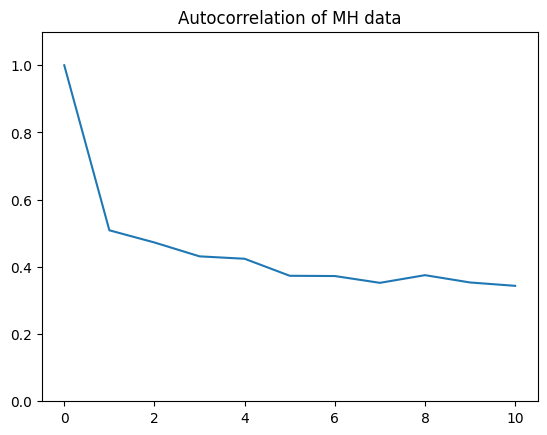

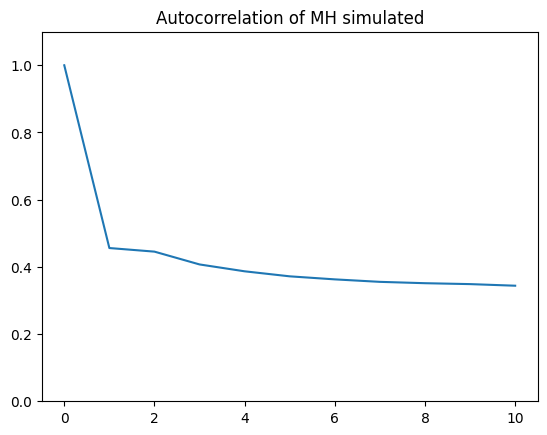

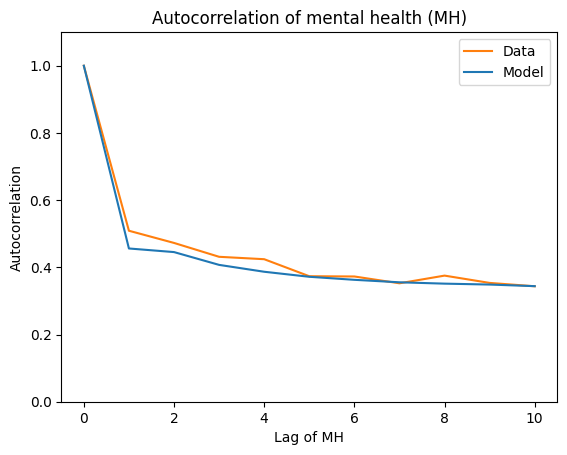

In [9]:

autocorr_y_lim = [0, 1.1]
from typing import Tuple

def plot_autocorr(autocorr_data: np.ndarray, var_name: str = None, y_lim: list = [0, 1.1], quietly: bool = False)-> Tuple[plt.Figure, plt.Axes]:
    fig_data, ax_data = plt.subplots()
    ax_data.plot(autocorr_data)
    ax_data.set_title(f"Autocorrelation of {var_name}")
    ax_data.set_ylim(y_lim)
    if not quietly:
        plt.show()
    return fig_data, ax_data

quietly = True
MH_autocorr = autocorr_pd["MH"].values
fig_data_MH, ax_data_MH = plot_autocorr(MH_autocorr, "MH data", autocorr_y_lim, quietly = quietly)

# H_hist = myShocks.H_hist[:, :, :, :-1]
H_hist = myShocks_adj.H_hist[:, :, :, :-1]
H_hist_ac = tb.lagged_corr(H_hist, max_lag=10)
fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim, quietly = quietly)
print("H_hist_ac", H_hist_ac)

corr_save_path = main_path + "output/autocorr_figs/"
comb_fig_title_prefix = "Autocorrelation of "
# comb_fig_title_suffix = " in the data and the model"
comb_fig_title_suffix = ""

label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
x_label = "Lag"
y_label = "Autocorrelation"
fig_comb_MH_autocorr, ax_comb_MH_autocorr = tb.combine_plots([(fig_data_MH, ax_data_MH), (fig_sim_H_ac, ax_sim_H_ac)],
                                                                comb_fig_title = comb_fig_title_prefix + "mental health (MH)" + comb_fig_title_suffix, 
                                                                x_label = x_label + " of MH", y_label = y_label,
                                                                label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_MH.pdf")

bad_MH_age_data    age  mean_badMH
0   25    0.480863
1   26    0.490605
2   27    0.476934
3   28    0.457216
4   29    0.461356
bad_MH_age_sim [0.48       0.53029476 0.51721044 0.48464043 0.49545429 0.48923761
 0.48979913 0.47673617 0.49788571 0.46475322 0.48253477 0.46596295
 0.48575908 0.48851623 0.47375546 0.46260787 0.45476302 0.44852187
 0.4296741  0.42005453 0.42266928 0.43729512 0.43467027 0.42018418
 0.42620348 0.41325777 0.42322351 0.4213459  0.42802948 0.42384161
 0.43121917 0.43435867 0.42388166 0.41616971 0.38680707 0.39132324
 0.37671264 0.35910434 0.35411852 0.355352   0.33337646 0.33115433
 0.33816389 0.32480129 0.31092922 0.33730209 0.32255496 0.32750704
 0.31088089 0.31678611 0.31274676]


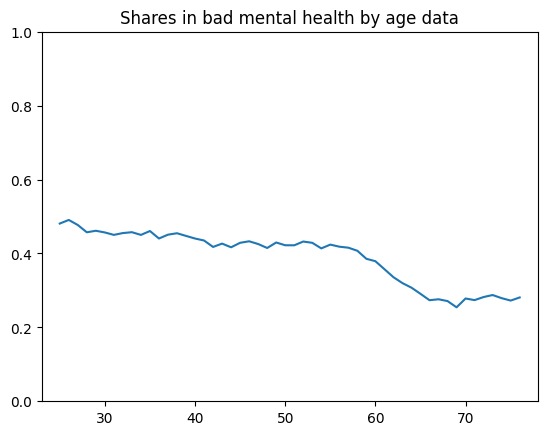

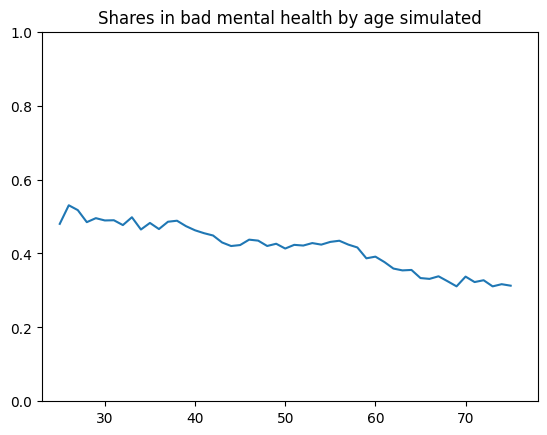

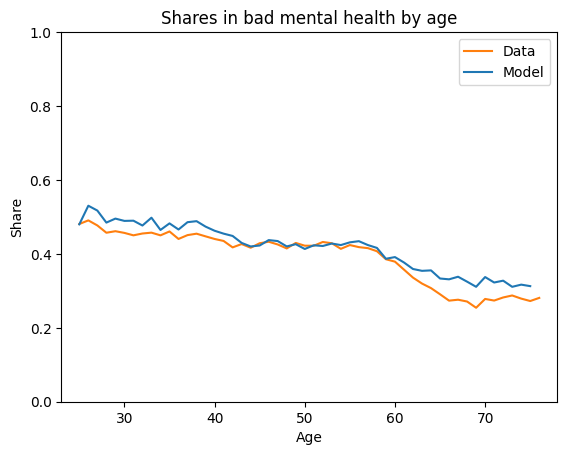

In [10]:

import model_uncert as model

# trans_path_uncond = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
# myPars.H_trans = io_manager.read_and_shape_H_trans_uncond_age(myPars, trans_path_uncond)

# H_hist = myShocks.H_hist[:, :, :, :-1]
# H_hist_ac = lagged_corr(H_hist, max_lag=10)
# fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim)
# # print("H_hist_ac", H_hist_ac)

shares_y_lim = [0, 1.0]
# shares in bad health by earnings (maybe later by wage, hours, etc)
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
print("bad_MH_age_data", bad_MH_age_data.head())
# get second column as numpy array
bad_MH_age_data = bad_MH_age_data.to_numpy()[:,1:]
# plot shares in bad health by earnings
fig_bad_MH_data, ax_bad_MH_data = plt.subplots()
ax_bad_MH_data.plot(age_grid, bad_MH_age_data)
ax_bad_MH_data.set_title("Shares in bad mental health by age data")
ax_bad_MH_data.set_xlim([age_grid[0]-2, age_grid[-1]+2])    
ax_bad_MH_data.set_ylim(shares_y_lim)
# plt.show()

# model shares in bad health by age
# weighted_H_hist = model.gen_weighted_sim(myPars, H_hist) 
weighted_H_hist = model.gen_weighted_sim(myPars_adj, H_hist) 
good_MH_age_sim = np.sum(weighted_H_hist, tuple(range(H_hist.ndim - 1)))
bad_MH_age_sim = 1 - good_MH_age_sim
# print("good_MH_age_sim", good_MH_age_sim)
print("bad_MH_age_sim", bad_MH_age_sim)
fig_bad_MH_sim, ax_bad_MH_sim = plt.subplots()
ax_bad_MH_sim.plot(age_grid[:-1], bad_MH_age_sim)
ax_bad_MH_sim.set_title("Shares in bad mental health by age simulated")
ax_bad_MH_sim.set_xlim([age_grid[0]-2, age_grid[-1]+2])
ax_bad_MH_sim.set_ylim(shares_y_lim)
# plt.show()

fig_comb_bad_MH, ax_comb_bad_MH = tb.combine_plots([(fig_bad_MH_data, ax_bad_MH_data), (fig_bad_MH_sim, ax_bad_MH_sim)],
                                                    comb_fig_title = "Shares in bad mental health by age", x_label = "Age", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "shares_bad_MH.pdf")